In [60]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('Golf.csv')

In [62]:
df

,Outlook,Temp,Humidity,Windy,Play_Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [63]:
# since all values are categorical we need to encode them
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [64]:
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Temp'] = le.fit_transform(df['Temp'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Windy'] = le.fit_transform(df['Windy'])
df['Play_Golf'] = le.fit_transform(df['Play_Golf'])

In [65]:
df

,Outlook,Temp,Humidity,Windy,Play_Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [66]:
X = df.drop('Play_Golf', axis=1)
y = df['Play_Golf']

In [67]:
# we are using gini index for splitting
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
y_pred = clf.predict(X)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [70]:
confusion_matrix(y,y_pred)

array([[5, 0],
       [0, 9]], dtype=int64)

In [71]:
accuracy_score(y,y_pred)

1.0

In [72]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: 0



In [73]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [74]:
import matplotlib.pyplot as plt

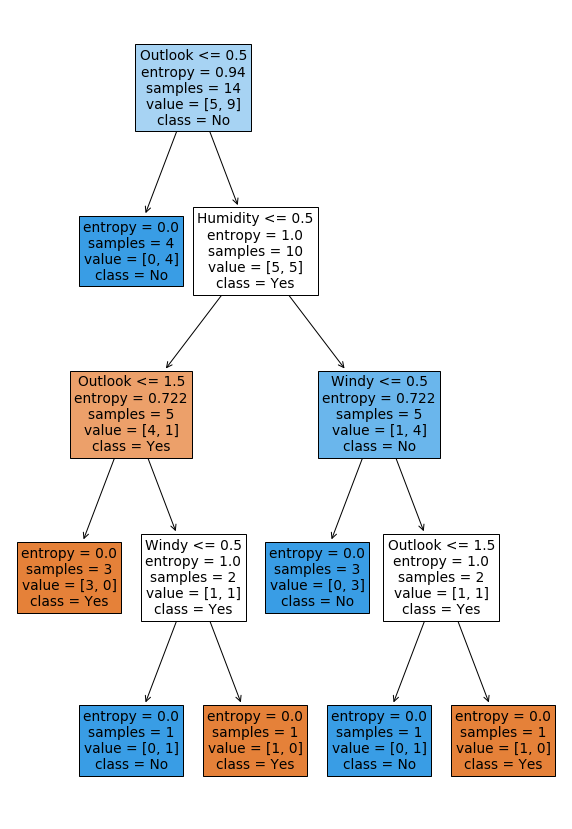

In [75]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['Yes','No'],
                   filled=True)